# DATA 601: HW4

**Learning Objectives**

- Work with realworld datasets that can be represented using tabular data structures.
- Gain experience wrangling and organizing data using `pandas`.
- Produce visualizations summarizing information from tabular data.

_This is an individual homework assignment._ 

Please complete this homework assignment within the Jupypter notebook environment, and provide your answers where indicated.

#### Submission 

Your submission will be manually tested and graded. In order to ensure that everything goes smoothly, please ensure that: 

- your notebook runs on the Data Science Hub environment, 
- you have provided your solutions where asked without altering any other parts of this notebook,

_You do not need to submit the datasets provided for this homework._


## Dataset

In this homework, you will be working with a building utility usage dataset that contains usage data for six buildings at the University of Calgary over a period of three years. The data has been made available by the [Office of Sunstainability](https://www.ucalgary.ca/sustainability/campus-learning-lab) at the University of Calgary specifically for use in DATA 601. 

_Please do not share the data with anyone in any form_.

The original data is in excel format and contains a hierarchical index. For this assignment, you will be working with a slightly modified version where the building names have been anonymized and the hierarchical index has been flattended into a [tidy format](https://r4ds.had.co.nz/tidy-data.html). The resulting dataset is available on D2L in CSV format.

<!-- BEGIN QUESTION -->

## TASK 0

### Read the Dataset

- Please ensure that the data is available to you locally on the machine you are working on. 
- Read the data using `pandas`, display the head and tail of the data and familiarize yourself with the variables contained in the dataset. 

In [17]:
# Use this cell to collect package imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import math

In [3]:
# Read the data into a pandas dataframe and display the head and tail

df=pd.read_csv('Building Data.csv')
df.head()

,Date,Building,Chilled Water (kWh),Cooling (kWh),Domestic Cold Water (m3),Electricity (kWh),Heating (kWh),Heating Water (kWh),Natural Gas (kWh)
0,2018-10-01,B1,NaN,"4,920.66",6.39,"13,240.10","16,244.46",NaN,"1,319.45"
1,2018-10-01,B2,NaN,"4,258.32",89.69,"13,846.41","50,505.60",NaN,"2,427.78"
2,2018-10-01,B3,0,NaN,70.1,"7,181.70",NaN,"12,147.23",0
3,2018-10-01,B4,0,NaN,38.1,"9,500.00",NaN,"8,177.78",0
4,2018-10-01,B5,383.92,NaN,25.18,"2,038.85",NaN,"3,388.89",0


In [4]:
df.tail()

,Date,Building,Chilled Water (kWh),Cooling (kWh),Domestic Cold Water (m3),Electricity (kWh),Heating (kWh),Heating Water (kWh),Natural Gas (kWh)
6571,2021-09-30,B2,NaN,"6,031.40",33.3,"25,053.89","9,341.67",NaN,5.56
6572,2021-09-30,B3,"27,630.74",NaN,23.1,"4,035.63",NaN,"4,536.11",0
6573,2021-09-30,B4,"5,049.75",NaN,1.3,"5,308.12",NaN,"6,591.68",0
6574,2021-09-30,B5,"1,310.03",NaN,26.18,"2,111.07",NaN,988.89,0
6575,2021-09-30,B6,"1,523.97",NaN,1.0,"3,263.78",NaN,0,0.0



<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## TASK 1

### Data Wrangling

At this stage, it might be helpful to do some data cleaning and wrangling to facilitate the tasks below. 

- Ensure that the numerical values are read in properly. If not, please use an appropiate numerical type to represent columns that contain numerical quantities.
- The `Date` column contains year, month and day information that needs to be parsed as such so that the data can be inspected at yearly, monthly and daily granularities. There are multiple ways of doing this; one way is to separate the year, month and day out into separate columns. You can also build a hierarchical row index with year, month and day as different levels of the index. 
 
 You may find [`pandas.to_datetime()`](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) helpful for this task.
 Please also have a look at the documentation for [`pandas.read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). Some helpful type conversions and cleanup can be performed by pandas at the data read stage.

In [5]:
# Use this cell to do any data type conversions. Alternatively, you may want to pass in appropriate 
# arguments when reading in data above to ensure that the types are inferred correctly.

# Do any conversions needed and then print out the `dtypes` for the non-date columns. 

# Fill in all missing values with mean value for each column
# Check missing values for every column

df.isna().any()

Date                        False
Building                    False
Chilled Water (kWh)          True
Cooling (kWh)                True
Domestic Cold Water (m3)     True
Electricity (kWh)           False
Heating (kWh)                True
Heating Water (kWh)          True
Natural Gas (kWh)           False
dtype: bool

In [6]:
#Convert all str to float for numerical columns
df['Chilled Water (kWh)']=df['Chilled Water (kWh)'].astype(str).str.replace(",", "").astype(float)
df['Cooling (kWh)']=df['Cooling (kWh)'].astype(str).str.replace(",", "").astype(float)
df['Domestic Cold Water (m3)']=df['Domestic Cold Water (m3)'].astype(str).str.replace(",", "").astype(float)
df['Electricity (kWh)']=df['Electricity (kWh)'].astype(str).str.replace(",", "").astype(float)
df['Heating (kWh)']=df['Heating (kWh)'].astype(str).str.replace(",", "").astype(float)
df['Heating Water (kWh)']=df['Heating Water (kWh)'].astype(str).str.replace(",", "").astype(float)
df['Natural Gas (kWh)']=df['Natural Gas (kWh)'].astype(str).str.replace(",", "").astype(float)

In [7]:
#Print out dtypes for all columns
print(df.dtypes)

Date                         object
Building                     object
Chilled Water (kWh)         float64
Cooling (kWh)               float64
Domestic Cold Water (m3)    float64
Electricity (kWh)           float64
Heating (kWh)               float64
Heating Water (kWh)         float64
Natural Gas (kWh)           float64
dtype: object


In [117]:
# Use this cell to do any wrangling on the date column. Then display the resulting dataframe

# Divide column date into three columns
df['Date']=pd.to_datetime(df['Date'])
y, m, d=[], [], []
def divide_date(col):
    for i in col:
        y.append(i.year)
        m.append(i.month)
        d.append(i.day)
        
    date=pd.DataFrame()
    date['Year']=y
    date['Month']=m
    date['Day']=d
    return date

new_date=divide_date(df['Date'])   
df1=pd.concat([new_date, df], axis=1, sort=False)
df1.drop(columns=['Date'])


,Year,Month,Day,Building,Chilled Water (kWh),Cooling (kWh),Domestic Cold Water (m3),Electricity (kWh),Heating (kWh),Heating Water (kWh),Natural Gas (kWh)
0,2018,10,1,B1,NaN,4920.66,6.39,13240.10,16244.46,NaN,1319.45
1,2018,10,1,B2,NaN,4258.32,89.69,13846.41,50505.60,NaN,2427.78
2,2018,10,1,B3,0.00,NaN,70.10,7181.70,NaN,12147.23,0.00
3,2018,10,1,B4,0.00,NaN,38.10,9500.00,NaN,8177.78,0.00
4,2018,10,1,B5,383.92,NaN,25.18,2038.85,NaN,3388.89,0.00
...,...,...,...,...,...,...,...,...,...,...,...
6571,2021,9,30,B2,NaN,6031.40,33.30,25053.89,9341.67,NaN,5.56
6572,2021,9,30,B3,27630.74,NaN,23.10,4035.63,NaN,4536.11,0.00
6573,2021,9,30,B4,5049.75,NaN,1.30,5308.12,NaN,6591.68,0.00
6574,2021,9,30,B5,1310.03,NaN,26.18,2111.07,NaN,988.89,0.00


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## TASK 2

### Exploring the Data for 2019

For this task, you will be working with usage data for the year 2019. For the year 2019, manipulate your dataframe to extract and visualize the following information:
1. Electricity usage per building for the entire year.
2. Total energy usage per building for the entire year. To determine total energy usage, add the variables that are in `kWh` units.
3. Box plots showing the daily energy usage (aggregated over the buildings) per month. As in the previous task, add the variables that are in `kWh` units to determine daily totals. 

For the tasks above where the type visualization is not clearly spelled out,  please choose an appropriate visualization that clearly shows the requested information. Please also ensure that you provide appropriate labels/legends/colorbars so that your visualizations are readable and self-contained.

In [118]:
# Solution for 1.
# Select all rows in 2019
df2019=df1.loc[df1['Year'] == 2019][['Building','Electricity (kWh)']]
#Group by Building and get the sum of electricity usage for each building
df2019_building=df2019.groupby("Building").sum("Building")
df2019_building

,Electricity (kWh)
Building,
B1,4178192.04
B2,9172640.37
B3,1669895.96
B4,2668782.35
B5,671564.38
B6,1277728.52


<AxesSubplot:xlabel='Building'>

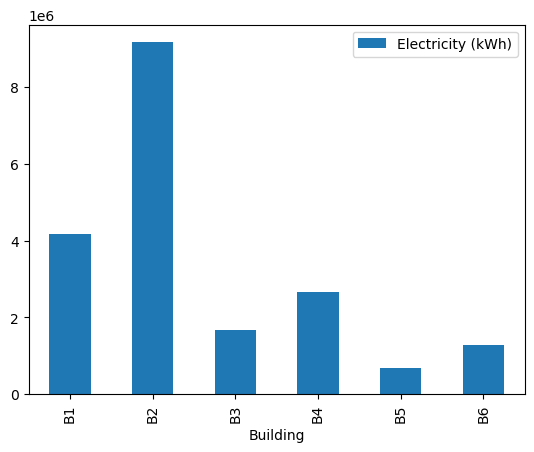

In [119]:
#Visualize the result for task 1
df2019_building.plot.bar()

In [120]:
# Solution for 2.
df_usage=df1.iloc[:, 4:10].loc[df1['Year'] == 2019].groupby("Building").sum("Building")
df_usage["Total Energy Usage (KWh)"]=df_usage.sum(axis=1)
df_usage

,Chilled Water (kWh),Cooling (kWh),Domestic Cold Water (m3),Electricity (kWh),Heating (kWh),Total Energy Usage (KWh)
Building,,,,,,
B1,0.00,2096380.94,9700.28,4178192.04,3385556.90,9669830.16
B2,0.00,1860480.26,27903.90,9172640.37,8684276.23,19745300.76
B3,1179947.53,0.00,16878.98,1669895.96,0.00,2866722.47
B4,626678.74,0.00,5785.80,2668782.35,0.00,3301246.89
B5,320132.60,0.00,8040.88,671564.38,0.00,999737.86
B6,299208.80,0.00,1589.95,1277728.52,0.00,1578527.27


<AxesSubplot:xlabel='Building'>

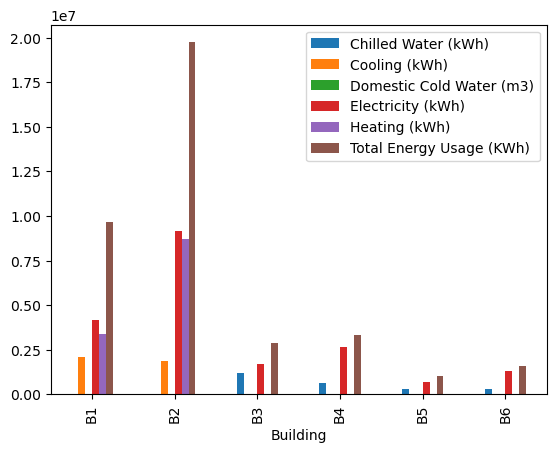

In [121]:
#Visualize the result for task 2
df_usage.plot.bar()

In [122]:
# Solution for 3.
df_month=df1.loc[df1['Year'] == 2019].groupby(["Building", "Month", "Day"]).sum("Buidling")
df_month["Daily Energy Usage (KWh) for a Building per Month"]=df_month.sum(axis=1)
df_month

Year  Chilled Water (kWh)  Cooling (kWh)  \
Building Month Day                                             
B1       1     1    2019                  0.0        4478.13   
               2    2019                  0.0        4615.87   
               3    2019                  0.0        4387.27   
               4    2019                  0.0        4554.32   
               5    2019                  0.0        4721.37   
...                  ...                  ...            ...   
B6       12    27   2019                  0.0           0.00   
               28   2019                  0.0           0.00   
               29   2019                  0.0           0.00   
               30   2019                  0.0           0.00   
               31   2019                  0.0           0.00   

                    Domestic Cold Water (m3)  Electricity (kWh)  \
Building Month Day                                                
B1       1     1                        0.01           12166.02   
               2                        1.84           12005.35   
               3                        1.51           11876.57   
               4                       10.43           10598.96   
               5                        0.00           10618.96   
...                                      ...                ...   
B6       12    27                       0.10            3631.57   
               28                       0.10            3583.92   
               29                       0.10            3621.71   
               30                       0.90            3544.55   
               31                       0.10            3554.11   

                    Heating (kWh)  Heating Water (kWh)  Natural Gas (kWh)  \
Building Month Day                                                          
B1       1     1         14030.57                 0.00               0.00   
               2          8691.67                 0.00               0.00   
               3          9933.34                 0.00               0.00   
               4         11463.90                 0.00               0.00   
               5         17419.46                 0.00               0.00   
...                           ...                  ...                ...   
B6       12    27            0.00             22513.91             241.67   
               28            0.00             23480.57             280.56   
               29            0.00             21775.02             183.33   
               30            0.00             21802.80             147.22   
               31            0.00             20980.57              66.67   

                    Daily Energy Usage (KWh) for a Building per Month  
Building Month Day                                                     
B1       1     1                                             32693.73  
               2                                             27333.73  
               3                                             28217.69  
               4                                             28646.61  
               5                                             34778.79  
...                                                               ...  
B6       12    27                                            28406.25  
               28                                            29364.15  
               29                                            27599.16  
               30                                            27514.47  
               31                                            26620.45  

[2190 rows x 9 columns]

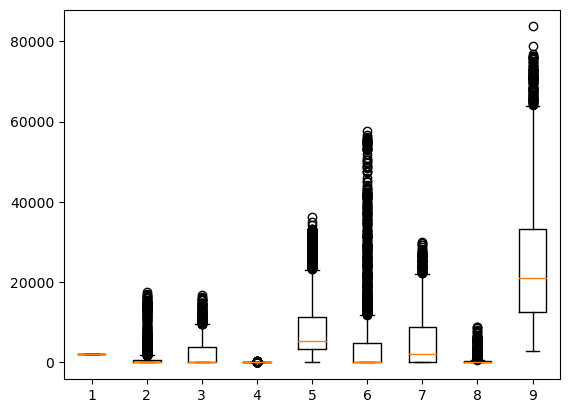

In [123]:
#Plot boxplot
plt.boxplot(df_month)
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## TASK 3

### Exploring trends over time

You may approach this task however you see fit. We expect appropriate use of visualizations and summary statistics, and textual explanations of your approach and findings following your code.

Consider the energy usage for each building over the entire timeframe available. Address the following questions:
- How does use of natural gas and electricity compare between buildings? Comment on magnitude and variance of usage.
- Can you identify any impacts of the pandemic on energy usage? Reflect on why/why not.

In [128]:
# Solution for 1.
df3a=df1[["Year", "Building", "Electricity (kWh)", "Natural Gas (kWh)"]].groupby(["Building", "Year"]).sum("Year")
df3a["Total Usage (KWh)"]=df3a.sum(axis=1)
df3a

Electricity (kWh)  Natural Gas (kWh)  Total Usage (KWh)
Building Year                                                         
B1       2018         1129864.38           38697.28         1168561.66
         2019         4178192.04         1559076.27         5737268.31
         2020         4087421.53         2154952.41         6242373.94
         2021         2909121.64         1519154.65         4428276.29
B2       2018         1041054.95          180525.18         1221580.13
         2019         9172640.37          501003.06         9673643.43
         2020         9414411.45          127395.99         9541807.44
         2021         7021903.02            4561.19         7026464.21
B3       2018          592896.58               0.00          592896.58
         2019         1669895.96               0.00         1669895.96
         2020         1681111.39               0.00         1681111.39
         2021         1277619.92               0.00         1277619.92
B4       2018          750335.54               0.00          750335.54
         2019         2668782.35               0.00         2668782.35
         2020         2227665.45               0.00         2227665.45
         2021         1575041.18               0.00         1575041.18
B5       2018          182726.52               0.00          182726.52
         2019          671564.38               0.00          671564.38
         2020          631267.43               0.00          631267.43
         2021          436896.88               0.00          436896.88
B6       2018          341365.49           20238.92          361604.41
         2019         1277728.52           41608.35         1319336.87
         2020         1310337.60           38931.98         1349269.58
         2021          998895.14           19938.92         1018834.06

<AxesSubplot:xlabel='Building,Year'>

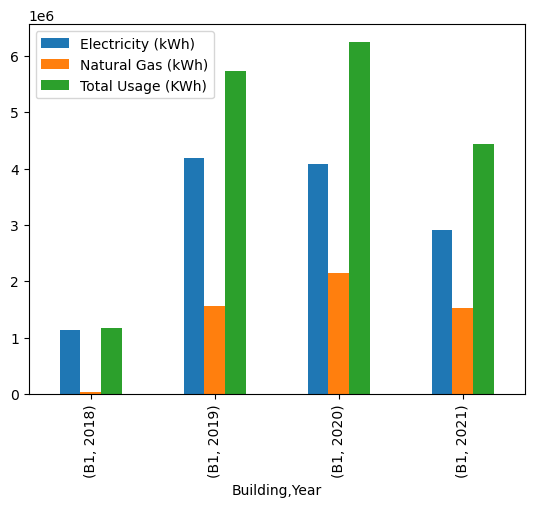

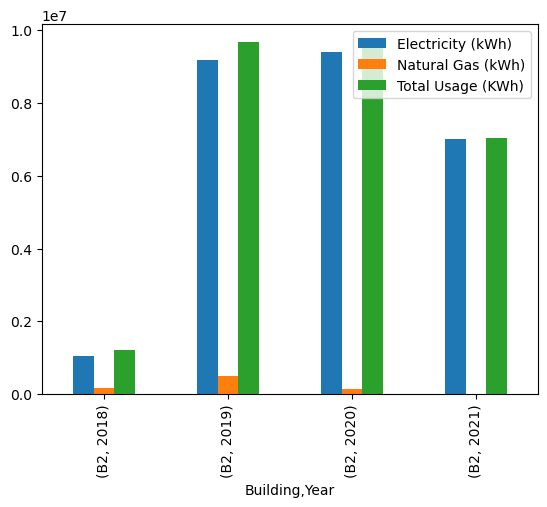

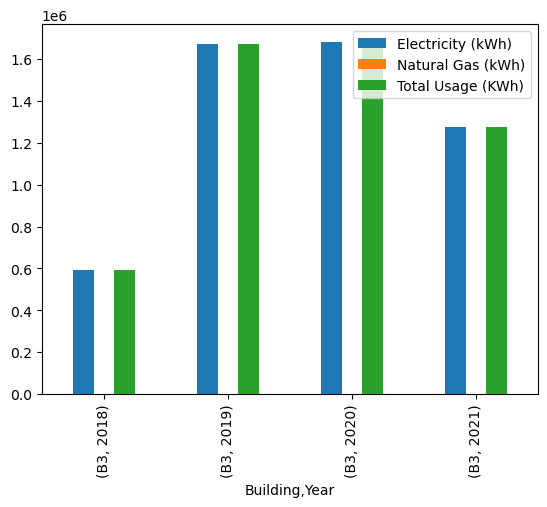

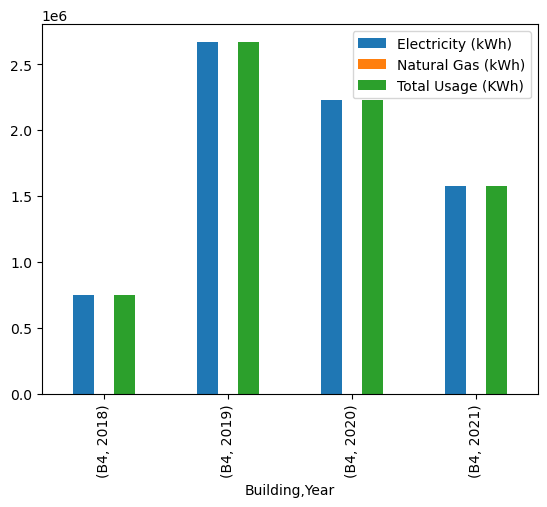

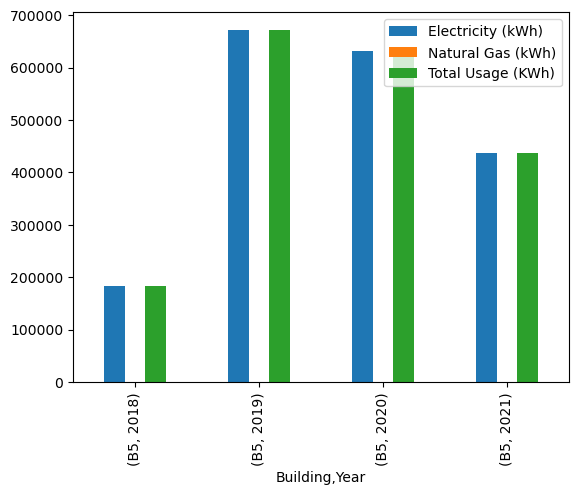

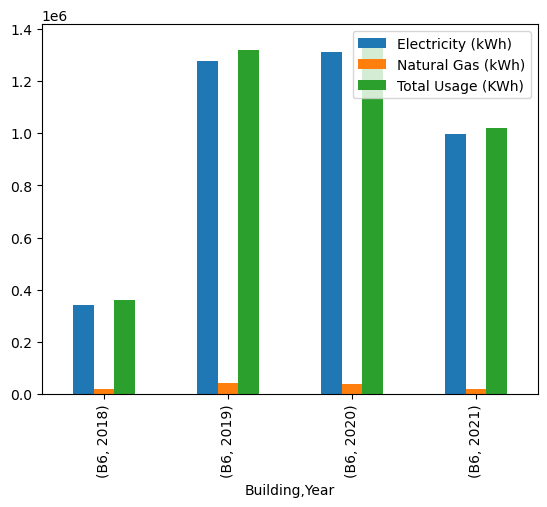

In [129]:
#Plot bar graphs to explore the trends
#fig, axes = plt.subplots(2, 3)
dfb1=df3a.loc[['B1']]
#dfb1.plot.bar(ax=axes[0,0])
dfb1.plot.bar(legend=True)

dfb2=df3a.loc[['B2']]
#dfb2.plot(ax=axes[0,1])
dfb2.plot.bar(legend=True)

dfb3=df3a.loc[['B3']]
#dfb3.plot(ax=axes[0,2])
dfb3.plot.bar(legend=True)

dfb4=df3a.loc[['B4']]
#dfb4.plot(ax=axes[1,0])
dfb4.plot.bar(legend=True)

dfb5=df3a.loc[['B5']]
#dfb5.plot(ax=axes[1,1])
dfb5.plot.bar(legend=True)

dfb6=df3a.loc[['B6']]
#dfb6.plot(ax=axes[1,2])
dfb6.plot.bar(legend=True)

In [140]:
# Solution for 2.
df3b=df1.groupby(["Building", "Year"]).sum("Year")
df3b["Total Usage (KWh)"]=df3a.sum(axis=1)
df3b=df3b.drop(columns=['Month','Day'])
df3b

Chilled Water (kWh)  Cooling (kWh)  Domestic Cold Water (m3)  \
Building Year                                                                 
B1       2018                 0.00      469728.49                   1855.40   
         2019                 0.00     2096380.94                   9700.28   
         2020                 0.00     2162714.38                   4945.45   
         2021                 0.00     1791138.59                   1432.72   
B2       2018                 0.00      413702.05                   6380.10   
         2019                 0.00     1860480.26                  27903.90   
         2020                 0.00     1529630.22                   5649.11   
         2021                 0.00     1445620.05                   5865.00   
B3       2018                 0.00           0.00                   4721.05   
         2019           1179947.53           0.00                  16878.98   
         2020           1659872.48           0.00                  17644.20   
         2021            900068.16           0.00                   7197.15   
B4       2018                 0.00           0.00                   1700.30   
         2019            626678.74           0.00                   5785.80   
         2020            799907.96           0.00                   8936.35   
         2021            907076.38           0.00                    615.40   
B5       2018             53454.73           0.00                   2220.62   
         2019            320132.60           0.00                   8040.88   
         2020            415596.71           0.00                   6813.21   
         2021            136799.71           0.00                   3663.20   
B6       2018             10752.80           0.00                    392.80   
         2019            299208.80           0.00                   1589.95   
         2020            524714.43           0.00                    755.00   
         2021            564169.12           0.00                    590.30   

               Electricity (kWh)  Heating (kWh)  Heating Water (kWh)  \
Building Year                                                          
B1       2018         1129864.38     1300492.70                 0.00   
         2019         4178192.04     3385556.90                 0.00   
         2020         4087421.53     3439762.60                 0.00   
         2021         2909121.64     3308496.96                 0.00   
B2       2018         1041054.95     3519186.17                 0.00   
         2019         9172640.37     8684276.23                 0.00   
         2020         9414411.45     5636571.26                 0.00   
         2021         7021903.02     4583696.71                 0.00   
B3       2018          592896.58           0.00            992039.71   
         2019         1669895.96           0.00           3349149.83   
         2020         1681111.39           0.00           3600284.90   
         2021         1277619.92           0.00           2322120.19   
B4       2018          750335.54           0.00            656686.64   
         2019         2668782.35           0.00           2455943.66   
         2020         2227665.45           0.00           3549015.71   
         2021         1575041.18           0.00           2717021.57   
B5       2018          182726.52           0.00            206016.81   
         2019          671564.38           0.00            690147.78   
         2020          631267.43           0.00            539706.00   
         2021          436896.88           0.00            302986.34   
B6       2018          341365.49           0.00           1385176.05   
         2019         1277728.52           0.00           4892653.84   
         2020         1310337.60           0.00           5182645.79   
         2021          998895.14           0.00           3684193.17   

               Natural Gas (kWh)  Total Usage (KWh)  
Building Year                    

<AxesSubplot:xlabel='Building,Year'>

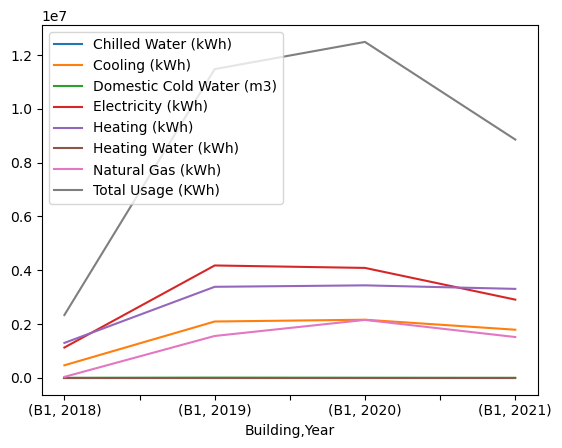

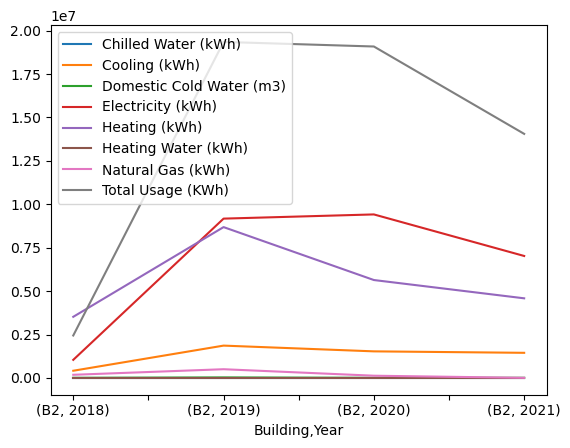

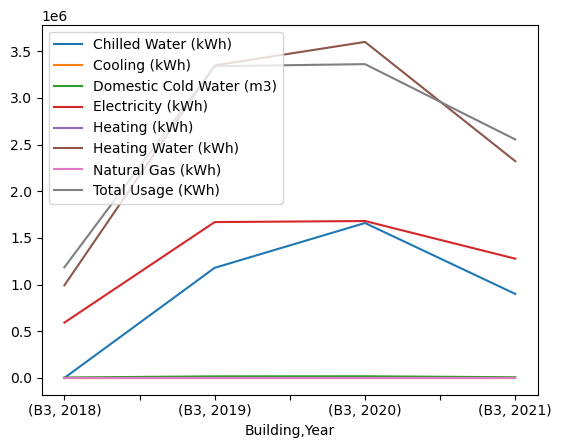

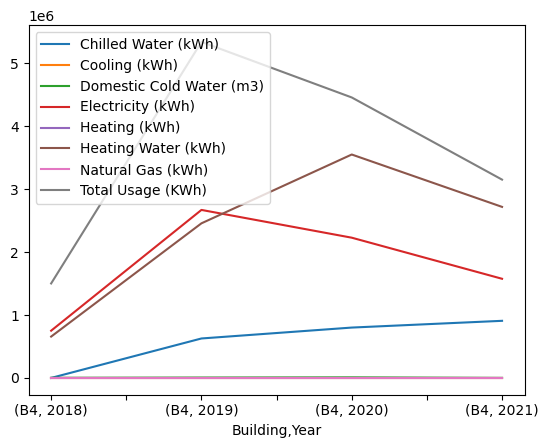

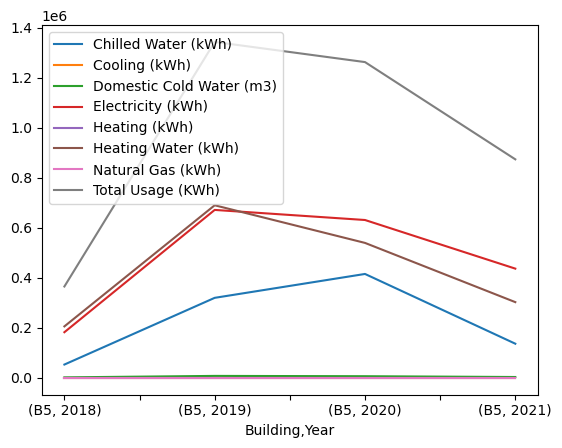

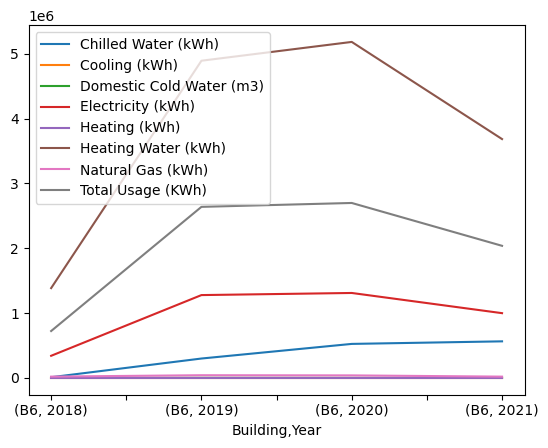

In [143]:
#Plot line graphs to explore the trends
#fig, axes = plt.subplots(2, 3)
dfB1=df3b.loc[['B1']]
#dfb1.plot.bar(ax=axes[0,0])
dfB1.plot.line(legend=True)

dfB2=df3b.loc[['B2']]
#dfb2.plot(ax=axes[0,1])
dfB2.plot.line(legend=True)

dfB3=df3b.loc[['B3']]
#dfb3.plot(ax=axes[0,2])
dfB3.plot.line(legend=True)

dfB4=df3b.loc[['B4']]
#dfb4.plot(ax=axes[1,0])
dfB4.plot.line(legend=True)

dfB5=df3b.loc[['B5']]
#dfb5.plot(ax=axes[1,1])
dfB5.plot.line(legend=True)

dfB6=df3b.loc[['B6']]
#dfb6.plot(ax=axes[1,2])
dfB6.plot.line(legend=True)

Based on these line plots, we cn see that for most of the buildings, the total energy consumption in 2020 and 2019 was close, but it began to decrease from 2020, because the school began to implement 100% online class mode due to the impact of the epidemic in March 2020, so the energy demand of the buildings was not as large as before. Even though the epidemic situation got relief in 2021, the univeristy still in partly lockdown which leads to the low energy usage in 2021, and the data was only recorded in August of 2021, which would make the data of 2021 lower than that of 2020.

<!-- END QUESTION -->

<!-- END QUESTION -->

